In [1]:
import numpy as np

In [2]:
# Function to check if a specific number can be placed in a cell

def check_field(r, c, x):
    global m
    # Check the row
    for i in range(0,9):
        if m[r][i] == x:
            return False

    # Check the column
    for i in range(0,9):
        if m[i][c] == x:
            return False

    # Check the box
    r_ = (r // 3) * 3
    c_ = (c // 3) * 3

    for i in range(0,3):
        for j in range(0,3):
            if m[r_+i][c_+j] == x:
                return False

    return True

# check_field(0, 2, 4)


In [3]:
# Check which and how many numbers can be put in a specific field
# 

In [4]:
# Define the solver

def solve_Sudoku():
    global m
    global i

    for r in range(9):
        for c in range(9):
            if m[r][c] == 0:
                for n in range(1, 10):
                    if check_field(r, c, n):
                        # Enter value
                        m[r][c] = n

                        # Check next cells
                        solve_Sudoku()

                        # Reached dead end
                        m[r][c] = 0

                return

    i = i + 1
    if print_m:
        print(np.matrix(m))
        print(i)

In [5]:
# Wrap solver to allow for benchmarking
def solve_Sudoku_bench(m_, print_matrix = False):
    global m
    global i
    global print_m
    print_m = print_matrix
    m = m_.copy()
    i = 0
    solve_Sudoku()

In [6]:
# Define Sudoku to be solved
# Easy

m_easy = [
    [0, 8, 6, 0, 1, 0, 0, 4, 3],
    [0, 0, 9, 0, 0, 7, 0, 6, 5],
    [0, 5, 2, 6, 0, 3, 0, 0, 0],
    [0, 7, 0, 0, 3, 0, 5, 0, 0],
    [0, 0, 0, 5, 9, 0, 4, 3, 0], 
    [0, 3, 5, 0, 0, 4, 0, 1, 0],
    [0, 0, 0, 8, 0, 1, 6, 0, 0],
    [6, 2, 7, 3, 0, 0, 1, 0, 8],
    [0, 9, 8, 0, 0, 6, 3, 7, 0]
]

solve_Sudoku_bench(m_easy, print_matrix = True)

[[7 8 6 9 1 5 2 4 3]
 [3 1 9 4 2 7 8 6 5]
 [4 5 2 6 8 3 7 9 1]
 [9 7 4 1 3 2 5 8 6]
 [2 6 1 5 9 8 4 3 7]
 [8 3 5 7 6 4 9 1 2]
 [5 4 3 8 7 1 6 2 9]
 [6 2 7 3 4 9 1 5 8]
 [1 9 8 2 5 6 3 7 4]]
1


In [7]:
# Medium
m_medium = [
    [0, 0, 2, 0, 0, 5, 0, 0, 3],
    [8, 6, 0, 7, 0, 2, 0, 0, 0],
    [5, 9, 1, 0, 3, 6, 0, 7, 0],
    [7, 3, 4, 0, 0, 0, 1, 0, 0],
    [6, 0, 0, 0, 2, 0, 0, 0, 4], 
    [0, 0, 8, 0, 0, 0, 5, 6, 7],
    [0, 4, 0, 6, 8, 0, 9, 3, 5],
    [0, 0, 0, 3, 0, 9, 0, 4, 8],
    [3, 0, 0, 2, 0, 0, 7, 0, 0]
]

solve_Sudoku_bench(m_medium, print_matrix = True)


[[4 7 2 8 1 5 6 9 3]
 [8 6 3 7 9 2 4 5 1]
 [5 9 1 4 3 6 8 7 2]
 [7 3 4 5 6 8 1 2 9]
 [6 1 5 9 2 7 3 8 4]
 [9 2 8 1 4 3 5 6 7]
 [2 4 7 6 8 1 9 3 5]
 [1 5 6 3 7 9 2 4 8]
 [3 8 9 2 5 4 7 1 6]]
1


In [8]:
# Hard

m_hard_1 = [
    [4, 6, 0, 2, 1, 8, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 8, 0],
    [7, 0, 3, 6, 0, 0, 5, 0, 0],
    [0, 0, 0, 0, 7, 3, 0, 0, 1],
    [0, 7, 0, 0, 0, 0, 0, 4, 0], 
    [2, 0, 0, 8, 6, 0, 0, 0, 0],
    [0, 0, 8, 0, 0, 1, 4, 0, 9],
    [0, 2, 0, 0, 0, 0, 0, 0, 6],
    [0, 0, 0, 4, 2, 6, 0, 5, 3]
]

solve_Sudoku_bench(m_hard_1, print_matrix = True)

[[4 6 5 2 1 8 9 3 7]
 [1 9 2 3 5 7 6 8 4]
 [7 8 3 6 4 9 5 1 2]
 [8 4 9 5 7 3 2 6 1]
 [5 7 6 1 9 2 3 4 8]
 [2 3 1 8 6 4 7 9 5]
 [6 5 8 7 3 1 4 2 9]
 [3 2 4 9 8 5 1 7 6]
 [9 1 7 4 2 6 8 5 3]]
1


In [9]:
# Save intermediate steps for animation

import copy

def solve_Sudoku_anim():
    global m
    global m_b
    global i

    for r in range(9):
        for c in range(9):
            if m[r][c] == 0:
                for n in range(1, 10):
                    if check_field(r, c, n):
                        # Enter value
                        m[r][c] = n
                        m_b.append(copy.deepcopy(m))

                        # Check next cells
                        solve_Sudoku_anim()

                        # Reached dead end
                        m[r][c] = 0
                        m_b.append(copy.deepcopy(m))

                return

    i = i + 1
    if print_m:
        print(np.matrix(m))
        print(i)


def solve_Sudoku_bench_anim(m_, print_matrix = False):
    global m
    global m_b
    global i
    global print_m

    print_m = print_matrix
    m = m_.copy()
    m_b = []
    i = 0
    solve_Sudoku_anim()

solve_Sudoku_bench_anim(m_easy, print_matrix = True)

[[7 8 6 9 1 5 2 4 3]
 [3 1 9 4 2 7 8 6 5]
 [4 5 2 6 8 3 7 9 1]
 [9 7 4 1 3 2 5 8 6]
 [2 6 1 5 9 8 4 3 7]
 [8 3 5 7 6 4 9 1 2]
 [5 4 3 8 7 1 6 2 9]
 [6 2 7 3 4 9 1 5 8]
 [1 9 8 2 5 6 3 7 4]]
1


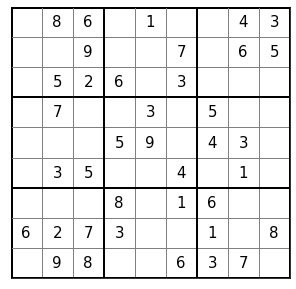

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from matplotlib.animation import PillowWriter, FuncAnimation, HTMLWriter
import matplotlib.animation as animation



#create data
x = [i for i in range(10)]
y = [i for i in range(10)]

fig, ax = plt.subplots(figsize = (5, 5))

#create scatterplot
# plt.scatter(x, y)

font = {'color':  'black',
        'size': 15
        }

font_red = {
        'color':  'red',
        'size': 15
        }

plt.xlim([0, 9])
plt.ylim([0, 9])

# Add boxes around grid and for each subgrid
rect = patches.Rectangle((0, 0), 9, 9, linewidth=3, edgecolor='black', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

for i in range(9):
        for j in range(9):
                rect = patches.Rectangle((i, j), 1, 1, linewidth=1, edgecolor='gray', facecolor='none')
                ax.add_patch(rect)

for i in range(3):
        for j in range(3):
                rect = patches.Rectangle((3 * i, 3 * j), 3, 3, linewidth=2, edgecolor='black', facecolor='none')
                ax.add_patch(rect)

# Hide ticks
plt.xticks([])
plt.yticks([])

# Set initial text labels - collect them
m_lab = copy.deepcopy(m)

# Create labels
for i in range(9):
        for j in range(9):
                if m[i][j] != 0:
                        m_lab[i][j] = plt.text(.5 + j, 8.5 - i, "", fontdict=font, ha='center', va='center')
                else:
                     m_lab[i][j] = plt.text(.5 + j, 8.5 - i, "", fontdict=font_red, ha='center', va='center')   

# Fill initial values
for i in range(9):
        for j in range(9):
                if m[i][j] != 0:
                        m_lab[i][j] = plt.text(.5 + j, 8.5 - i, str(m[i][j]), fontdict=font, ha='center', va='center')

def animate(s):
    m_c = m_b[s]
    for i in range(9):
        for j in range(9):
                v = m[i][j]
                v_c = m_c[i][j]
                if v == 0 and v_c != 0:
                    m_lab[i][j].set_text(str(v_c))
                elif v_c == 0:
                        m_lab[i][j].set_text("")


anim = FuncAnimation(fig, animate, frames=len(m_b))#range(0, len(m_b),3))

writer = PillowWriter(fps=50)  
anim.save("Sudoku_Animation.gif", writer=writer, dpi=50) 

# Optimize with https://ezgif.com/optimize/